In [1]:
using Gadfly

In [2]:
using DelimitedFiles

In [95]:
SP1 = readdlm("SP1.csv", ',')

10×8 Array{Float64,2}:
 1.26005   1.0  1.72062  0.19697   1.58973   0.737316  0.483021  0.984867
 1.26556   1.0  1.75659  0.201515  1.51019   0.750865  0.471208  0.951156
 1.36734   1.0  1.84953  0.177652  0.975649  0.868305  0.331589  1.04666
 0.987854  1.0  1.88825  0.168939  1.07392   0.855229  0.506327  1.00995
 0.997473  1.0  1.96943  0.119318  0.907401  0.890231  0.554297  1.35725
 1.00133   1.0  2.00362  0.130303  0.825086  0.886855  0.52929   1.38488
 1.48424   1.0  2.05944  0.138636  0.822969  0.878916  0.55985   1.38647
 1.48908   1.0  2.17086  0.123864  0.8752    0.889575  0.557205  1.36444
 1.52095   1.0  2.33802  0.114394  0.893606  0.902012  0.647556  1.35519
 1.55388   1.0  2.58538  0.121212  0.76356   0.930015  0.850357  1.43231

In [96]:
SPE1 = readdlm("SPE1.csv", ',')

10×8 Array{Float64,2}:
 1.15714  1.0       1.68987  0.861364  1.13085   0.171049  0.433429  0.497842
 1.16287  1.0       1.71298  0.859848  1.27171   0.14573   0.355647  0.49879
 1.26121  0.996912  1.72066  0.547348  0.790683  0.217744  0.526337  0.624273
 1.15822  1.0       1.74546  0.854167  1.03508   0.215744  0.46245   0.501189
 1.26182  1.0       1.84887  0.541288  0.751341  0.222876  0.530826  0.61996
 1.23514  1.0       1.79802  0.675758  0.726883  0.230745  0.503704  0.646949
 1.42178  1.0       1.97383  0.542424  0.688573  0.236797  0.499341  0.698609
 1.46691  1.0       2.03011  0.545076  0.628223  0.253224  0.518076  0.702509
 1.38797  1.0       2.1505   0.649621  0.60768   0.276472  0.574029  0.601278
 1.52493  0.999561  2.8263   0.848485  0.481733  0.339913  0.718671  0.507915

Gráfico comparando a variação do primeiro momento em relação ao parâmetro de simulação 7, $\mu$

In [5]:
#bounds for g
lg = [0.4, 1.0, 0.01, 0.01]
ug = [0.93, 48.0, 0.6, 0.99]
#ρ was limited at 0.93 because a higher value would create more periods and calculations would take longer than we could afford.


#bounds for s
#μ can be 0.5 month or 18 months
ls = [1, 1, 0.5] 
us = [50, 50, 16]

3-element Array{Int64,1}:
 50
 50
 16

In [91]:
#data_moments
data_moments = [1.479, 0.843, 2.76, 0.969, 0.6235, 0.5569, 0.773, 0.497];

In [10]:
moments = [3, 2, 4, 7, 5, 6, 1];

In [93]:
parameter = 1

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]



0.4

In [87]:
function plot_moment(parameter, moment, ub, lb, DataDou, DataZe, data_moments)
    
    
    X = LinRange(lb, ub, size(DataZe,1))
    
    p = plot()
    
    color_y1 = "#1f77b4"
    color_y2 = "#ff7f0e"
    
    
    
    
    
    #camada com os dados do Dou
    push!(p, layer(x=X, y = DataDou[:,moment],
            Geom.line, 
            Theme(default_color=color(color_y1),
                line_style=[:dash],
                line_width=0.4mm)))
    
    #camada com os dados do Ze
    push!(p, layer(x=X, y = DataZe[:,moment], 
            Geom.line, 
            Theme(default_color=color(color_y2),
                line_style=[:dot],
                line_width=0.4mm)))
    

    
    push!(p, Guide.manual_color_key("Estimação",
            ["Dou et al","Zé"], 
            [color_y1, color_y2]))

    
    label_moment = data_moments[moment]
    
    push!(p, Guide.xlabel("Parameter $parameter"))
    push!(p, Guide.ylabel("Moment $moment"))
    push!(p, Guide.title("Variation of Moment $moment as a function of Parameter $parameter, 
            Data moment = $label_moment"))

    ticksx = X
    push!(p, Guide.xticks(ticks=ticksx))
    
end
    


plot_moment (generic function with 2 methods)

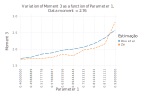

In [97]:
p = plot_moment(parameter, moment, ub, lb, SP1, SPE1, data_moments)

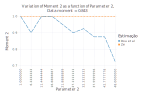

In [98]:
parameter = 2

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')


p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

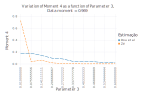

In [101]:
parameter = 3

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]



SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

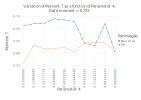

In [69]:
parameter = 4

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]

SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')


p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

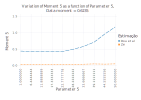

In [102]:
parameter = 5

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

#obs: o valor é quase crescente, mas oscila entre 0.038, 0.037 e 0.052. 
#Provavelmente porque a chance de J ser sorteado é muito alta, então o valor esperado de S passa a ser baixo

In [90]:
SPE[:,5]

10-element Array{Float64,1}:
 0.03864683857808859
 0.037599504662004665
 0.038240675990676
 0.04216388403263404
 0.04003031759906761
 0.03712471782411924
 0.04330680889665357
 0.050759553836926895
 0.045163558524831976
 0.05231124634090871

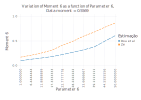

In [80]:
parameter = 6

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

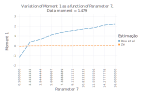

In [105]:
parameter = 7

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SPE = readdlm(string("SPE","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SPE, data_moments)

In [104]:
SPE[:,moment]

10-element Array{Float64,1}:
 -0.03465735902799726
  0.0
  0.0
  0.025290022791961998
  0.0
  0.0
  0.04145570191508831
  0.0
  0.049525036721664584
  0.0